# DoWhy 因果 API Demo


我们展示了一个添加因果扩展的简单示例 to any dataframe. 

In [1]:
import os, sys
sys.path.append(os.path.abspath("../../../"))

import dowhy.datasets
import dowhy.api

import numpy as np
import pandas as pd

from statsmodels.api import OLS

%matplotlib inline

## 获得因果模型和数据

通过 dowhy 的数据模块，获得一个数据框以及生成该数据的因果模型，然后实现 $do$-Calculus 生成 Counterfactuals 来研究相关性质。

In [2]:
data = dowhy.datasets.linear_dataset(beta=5,
        num_common_causes=1,
        num_instruments = 0,
        num_samples=1000,
        treatment_is_binary=True)
df = data['df']
df['y'] = df['y'] + np.random.normal(size=len(df)) 
# Adding noise to data. Without noise, the variance in Y|X, Z is zero, and mcmc fails.
# data['dot_graph'] = 'digraph { v ->y;X0-> v;X0-> y;}'

treatment= data["treatment_name"][0]
outcome = data["outcome_name"][0]
common_cause = data["common_causes_names"][0]
df

W0     v0         y
0    0.240697   True  4.928414
1    0.000084   True  5.173862
2    0.950475   True  5.002643
3    1.418750   True  4.310699
4   -0.332002  False  1.383824
..        ...    ...       ...
995  1.875115   True  4.329813
996  0.538284   True  5.484955
997 -0.634770  False  1.436272
998  0.594890   True  5.336496
999  0.382532   True  5.720229

[1000 rows x 3 columns]

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'W0']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.


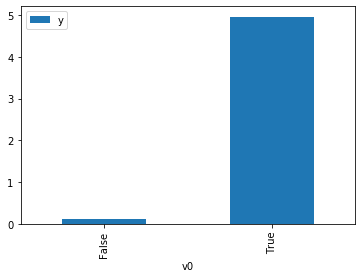

In [3]:
# data['df'] is just a regular pandas.DataFrame
df.causal.do(x=treatment,
             variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'},
             outcome=outcome,
             common_causes=[common_cause],
             proceed_when_unidentifiable=True)\
          .groupby(treatment).mean().plot(y=outcome, kind='bar')

INFO:dowhy.causal_graph:If this is observed data (not from a randomized experiment), there might always be missing confounders. Adding a node named "Unobserved Confounders" to reflect this.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'W0']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.


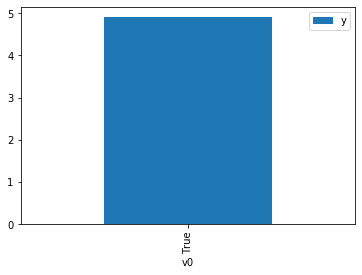

In [4]:
df.causal.do(x={treatment: 1}, 
              variable_types={treatment:'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome,
              method='weighting', 
              common_causes=[common_cause],
              proceed_when_unidentifiable=True)\
         .groupby(treatment).mean().plot(y=outcome, kind='bar')

In [5]:
cdf_1 = df.causal.do(x={treatment: 1}, 
              variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome, 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)

cdf_0 = df.causal.do(x={treatment: 0}, 
              variable_types={treatment: 'b', outcome: 'c', common_cause: 'c'}, 
              outcome=outcome, 
              dot_graph=data['dot_graph'],
              proceed_when_unidentifiable=True)


INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'W0']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers assume iid data.
INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']
INFO:dowhy.causal_identifier:Common causes of treatment and outcome:['U', 'W0']
INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.do_sampler:Using WeightingSampler for do sampling.
INFO:dowhy.do_sampler:Caution: do samplers ass

In [6]:
cdf_0

W0     v0         y  propensity_score     weight
0   -0.701821  False -0.183813          0.827329   1.208708
1    0.566814  False -0.378917          0.223957   4.465139
2   -0.072888  False -0.444856          0.543380   1.840333
3   -1.369989  False -0.646138          0.954634   1.047522
4    0.407697  False  1.122292          0.291034   3.436021
..        ...    ...       ...               ...        ...
995  1.481427  False -1.116987          0.036675  27.266477
996  0.378184  False  0.581096          0.304702   3.281893
997  1.291855  False  0.696985          0.054761  18.261136
998  1.003645  False  1.358347          0.098840  10.117335
999  0.898615  False -1.507249          0.121578   8.225183

[1000 rows x 5 columns]

In [7]:
cdf_1

W0    v0         y  propensity_score    weight
0    1.645192  True  3.027437          0.974193  1.026490
1    0.263406  True  3.968999          0.638951  1.565066
2    1.868578  True  4.441714          0.984104  1.016152
3    0.830910  True  4.575607          0.861479  1.160794
4    2.290609  True  4.205689          0.993697  1.006343
..        ...   ...       ...               ...       ...
995  1.852278  True  5.378302          0.983530  1.016746
996  2.451362  True  3.075562          0.995576  1.004443
997  1.513352  True  4.964406          0.965743  1.035473
998  1.085572  True  4.875919          0.916186  1.091482
999  1.944332  True  6.514778          0.986526  1.013658

[1000 rows x 5 columns]

## 对比线性回归模型

First, estimating the effect using the causal dataframe, and the 95% confidence interval.

In [8]:
(cdf_1['y'] - cdf_0['y']).mean()

In [9]:
1.96*(cdf_1['y'] - cdf_0['y']).std() / np.sqrt(len(df))

Comparing to the estimate from OLS.

In [10]:
model = OLS(np.asarray(df[outcome]), np.asarray(df[[common_cause, treatment]], dtype=np.float64))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              9757.
Date:                Thu, 19 Mar 2020   Prob (F-statistic):                        0.00
Time:                        21:28:02   Log-Likelihood:                         -1421.4
No. Observations:                1000   AIC:                                      2847.
Df Residuals:                     998   BIC:                                      2857.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.1327      0.038      3.493      0.000       0.058       0.207
x2             4.9106      0.060     82.020      0.000       4.793       5.028
==============================================================================
Omnibus:                        2.153   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                2.129
Skew:                          -0.113   Prob(JB):                        0.345
Kurtosis:                       2.995   Cond. No.                         3.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""